# Install the Quantum-Espresso software

In [1]:
# enter QE folder
%cd q-e

# run configure file
!DFLAGS='-D__FFTW3 ' FFT_LIBS='-lfftw3'  ./configure

# estimated total time: 1 minute

/Users/mollymcdonough/Code/matse-597/lab2/q-e
directory LAXlib : ok
directory FFTXlib/src : ok
directory UtilXlib : ok
directory dft-d3 : ok
directory KS_Solvers/Davidson : ok
directory KS_Solvers/Davidson_RCI : ok
directory KS_Solvers/CG : ok
directory KS_Solvers/PPCG : ok
directory KS_Solvers/ParO : ok
directory KS_Solvers/DENSE : ok
directory KS_Solvers/RMM : ok
directory upflib : ok
directory XClib : ok
directory Modules : ok
directory LR_Modules : ok
directory PW/src : ok
directory CPV/src : ok
directory PW/tools : ok
directory PP/src : ok
directory PWCOND/src : ok
directory PHonon/Gamma : ok
directory PHonon/PH : ok
directory PHonon/FD : ok
directory HP/src : ok
directory atomic/src : ok
directory EPW/src : ok
directory XSpectra/src : ok
directory NEB/src : ok
directory TDDFPT/src : ok
directory GWW/pw4gww : ok
directory GWW/gww : ok
directory GWW/head : ok
directory GWW/bse : ok
directory GWW/simple : ok
directory GWW/simple_bse : ok
directory GWW/simple_ip : ok
directory QEHeat

Run the cell to compile the code into the `pw.x` machine code (the binary).

If you need to make any other machine codes, like `dos.x` or `bands.x`, replace the `pw` with `dos` or `bands`.

To avoid having the recompile, you may save `/content/q-e/bin/pw.x` into your personal Google Drive.

In [36]:
!make pw

# estimated total time: up to 8 minutes

make: *** No rule to make target 'pw'.  Stop.


# Install the Atomic Simulation Environment (ASE) software

In [37]:
!apt install ase

# estimated total time: 1 minute

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ase is already the newest version (3.22.1-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


# Prepare the input file

Create a folder named "silicon".

Download the pseudopotential files from:

- https://pseudopotentials.quantum-espresso.org/legacy_tables ;
- or https://www.materialscloud.org/discover/sssp/table/efficiency ;
- or http://www.pseudo-dojo.org .

Upload the pseudopotential file in the folder "silicon".

In [38]:
# naviagat to the silicon/ folder
%cd /content/GaBi/

/content/GaBi


In [69]:
# create input file
qe_input = """
&control
  prefix='GaBi',
  pseudo_dir = '/content/GaBi/',
  outdir='/content/GaBi/'
/
&system
  ibrav = 2, celldm(1) = 12.03756, nat = 2, ntyp = 2,
  ecutwfc = 50.0,
/
&electrons
  conv_thr=1e-10,
/
ATOMIC_SPECIES
 Ga  69.723  Ga.pz-dn-kjpaw_psl.0.2.UPF
 Bi  208.9804 Bi.pz-dn-kjpaw_psl.1.0.0.UPF
ATOMIC_POSITIONS alat
 Ga 0.00 0.00 0.00
 Bi 0.25 0.25 0.25
! this is a comment
K_POINTS automatic
   8 8 8 1 1 1
"""

# We write the input script
with open("gabi.scf.in", "w") as f:
    f.write(qe_input)

Visualize the silicon atoms

In [71]:
import ase.io.espresso
from ase import Atoms
from ase.visualize import view
input_file = ase.io.espresso.read_espresso_in('gabi.scf.in')

atoms = Atoms(input_file)
view(atoms,viewer='x3d')

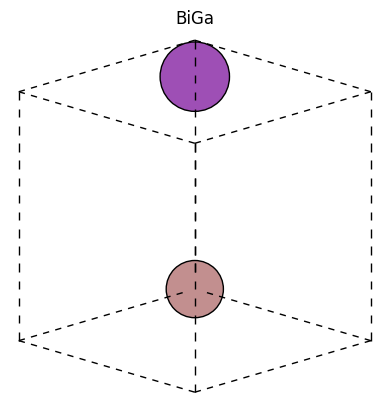

In [75]:
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms

fig, ax = plt.subplots()
plot_atoms(atoms, ax, radii=0.3, rotation=('45x,45y,90z'))
ax.set_title(atoms.get_chemical_formula())
ax.set_axis_off()
plt.show()

# Run the DFT simulation


In [76]:
!/content/q-e/bin/pw.x  -in gabi.scf.in > gabi.scf.out

# See the output file

In [77]:
!cat gabi.scf.out


     Program PWSCF v.7.3.1 starts on 19Apr2024 at 17:42: 2 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
         "P. Giannozzi et al., J. Chem. Phys. 152 154105 (2020);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Serial version
     9642 MiB available memory on the printing compute node when the environment starts

     Reading input from gabi.scf.in

     Current dimensions of program PWSCF are:
     Max number of different atomic species (ntypx) = 10
     Max number of k-points (npk) =  40000
     Max angular momentum in pseudopotentials (lmaxx) =  4
     file Ga.pz-dn-kjpaw_psl.0.2.UPF: wavefunction(s)  4S 3D renormalized
     fi

In [78]:
!grep -e "total energy  " -e "estimated" gabi.scf.out

     total energy              =   -1155.45624235 Ry
     estimated scf accuracy    <       0.03518499 Ry
     total energy              =   -1155.45949369 Ry
     estimated scf accuracy    <       0.00186958 Ry
     total energy              =   -1155.45999991 Ry
     estimated scf accuracy    <       0.00035580 Ry
     total energy              =   -1155.46007980 Ry
     estimated scf accuracy    <       0.00001258 Ry
     total energy              =   -1155.46008840 Ry
     estimated scf accuracy    <       0.00000866 Ry
     total energy              =   -1155.46008277 Ry
     estimated scf accuracy    <       0.00000854 Ry
     total energy              =   -1155.46008512 Ry
     estimated scf accuracy    <       0.00000094 Ry
     total energy              =   -1155.46008522 Ry
     estimated scf accuracy    <       0.00000028 Ry
     total energy              =   -1155.46008515 Ry
     estimated scf accuracy    <       0.00000021 Ry
     total energy              =   -1155.46008

In [79]:
# extract total energy in electron-volts
import ase.io
output = ase.io.read("/content/GaBi/gabi.scf.out")
output.get_total_energy()

-15720.83395944947

# Convergence test for plane-wave expansion (the kinetic-energy cutoff)

In [80]:
import numpy as np

# create a list of cutoff energies to be tested
cutoff_energies = np.arange(12,64,4)

# find the "cutoff energy" line in the input file
cutoff_index = qe_input.find('ecutwfc = ') + 10
total_energies = []

for cutoff in cutoff_energies:

  # update the input file with the new cutoff energy
  new_input_file = qe_input[:cutoff_index] + str(cutoff) + qe_input[cutoff_index+4:]
  print(new_input_file)

  # overwrite the input file
  with open("gabi.scf.in", "w") as f:
    f.write(new_input_file)

  !/content/q-e/bin/pw.x  -in gabi.scf.in > gabi.scf.out # run the DFT input file

  output = ase.io.read("/content/GaBi/gabi.scf.out") # read the output file

  total_energies.append(output.get_total_energy()) # record the calculated total energy

# estimated total time: < 1 minute


&control
  prefix='GaBi',
  pseudo_dir = '/content/GaBi/',
  outdir='/content/GaBi/'
/
&system
  ibrav = 2, celldm(1) = 12.03756, nat = 2, ntyp = 2,
  ecutwfc = 12,
/
&electrons
  conv_thr=1e-10,
/
ATOMIC_SPECIES
 Ga  69.723  Ga.pz-dn-kjpaw_psl.0.2.UPF
 Bi  208.9804 Bi.pz-dn-kjpaw_psl.1.0.0.UPF
ATOMIC_POSITIONS alat
 Ga 0.00 0.00 0.00
 Bi 0.25 0.25 0.25
! this is a comment
K_POINTS automatic
   8 8 8 1 1 1


&control
  prefix='GaBi',
  pseudo_dir = '/content/GaBi/',
  outdir='/content/GaBi/'
/
&system
  ibrav = 2, celldm(1) = 12.03756, nat = 2, ntyp = 2,
  ecutwfc = 16,
/
&electrons
  conv_thr=1e-10,
/
ATOMIC_SPECIES
 Ga  69.723  Ga.pz-dn-kjpaw_psl.0.2.UPF
 Bi  208.9804 Bi.pz-dn-kjpaw_psl.1.0.0.UPF
ATOMIC_POSITIONS alat
 Ga 0.00 0.00 0.00
 Bi 0.25 0.25 0.25
! this is a comment
K_POINTS automatic
   8 8 8 1 1 1


&control
  prefix='GaBi',
  pseudo_dir = '/content/GaBi/',
  outdir='/content/GaBi/'
/
&system
  ibrav = 2, celldm(1) = 12.03756, nat = 2, ntyp = 2,
  ecutwfc = 20,
/
&electro

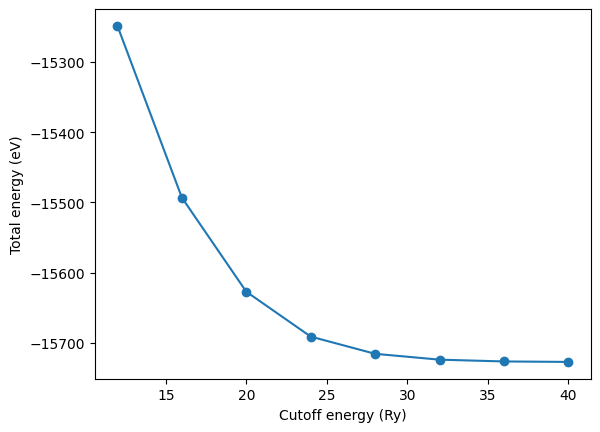

In [81]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

ax.plot(cutoff_energies, total_energies, 'o-')
ax.set_xlabel('Cutoff energy (Ry)')
ax.set_ylabel('Total energy (eV)')
plt.show()

# Convergence test for sampling of the Brillouin zone (the **k**-point grid)

In [84]:
import numpy as np

# create a list of k-points to be tested
kpoints = np.arange(1,9,1)

# find the "lattice constant" line in the input file
k_index = qe_input.find('K_POINTS') + 20

total_energies = []
for k in kpoints:

  # update the input file with the new lattice constant
  new_input_file = qe_input[:k_index] + str(k).ljust(2) + str(k).ljust(2) + str(k).ljust(2) + qe_input[k_index+8:]
  print(new_input_file)

  # overwrite the input file
  with open("gabi.scf.in", "w") as f:
    f.write(new_input_file)

  !/content/q-e/bin/pw.x  -in gabi.scf.in > gabi.scf.out # run the DFT input file

  output = ase.io.read("/content/GaBi/gabi.scf.out") # read the output file

  total_energies.append(output.get_total_energy()) # record the calculated total energy

# estimated total time: < 1 minute


&control
  prefix='GaBi',
  pseudo_dir = '/content/GaBi/',
  outdir='/content/GaBi/'
/
&system
  ibrav = 2, celldm(1) = 12.03756, nat = 2, ntyp = 2,
  ecutwfc = 30.0,
/
&electrons
  conv_thr=1e-10,
/
ATOMIC_SPECIES
 Ga  69.723  Ga.pz-dn-kjpaw_psl.0.2.UPF
 Bi  208.9804 Bi.pz-dn-kjpaw_psl.1.0.0.UPF
ATOMIC_POSITIONS alat
 Ga 0.00 0.00 0.00
 Bi 0.25 0.25 0.25
! this is a comment
K_POINTS automatic
 1 1 1 1 1 1


&control
  prefix='GaBi',
  pseudo_dir = '/content/GaBi/',
  outdir='/content/GaBi/'
/
&system
  ibrav = 2, celldm(1) = 12.03756, nat = 2, ntyp = 2,
  ecutwfc = 30.0,
/
&electrons
  conv_thr=1e-10,
/
ATOMIC_SPECIES
 Ga  69.723  Ga.pz-dn-kjpaw_psl.0.2.UPF
 Bi  208.9804 Bi.pz-dn-kjpaw_psl.1.0.0.UPF
ATOMIC_POSITIONS alat
 Ga 0.00 0.00 0.00
 Bi 0.25 0.25 0.25
! this is a comment
K_POINTS automatic
 2 2 2 1 1 1


&control
  prefix='GaBi',
  pseudo_dir = '/content/GaBi/',
  outdir='/content/GaBi/'
/
&system
  ibrav = 2, celldm(1) = 12.03756, nat = 2, ntyp = 2,
  ecutwfc = 30.0,
/
&elect

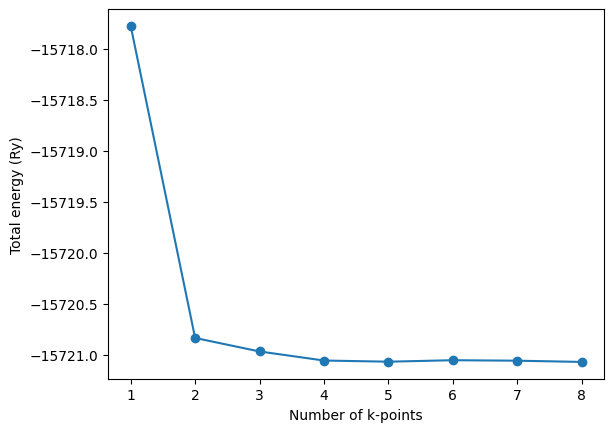

In [85]:
fig,ax = plt.subplots()

ax.plot(kpoints, total_energies,'o-')
ax.set_xlabel('Number of k-points')
ax.set_ylabel('Total energy (Ry)')

plt.show()

# Determination of lattice parameter

In [91]:
# create input file
qe_input = """
&control
  prefix='gabi',
  pseudo_dir = '/content/GaBi/',
  outdir='/content/GaBi/'
/
&system
  ibrav = 2, celldm(1) = 12.03756, nat = 2, ntyp = 2,
  ecutwfc = 30.0,
/
&electrons
  conv_thr=1e-10,
/
ATOMIC_SPECIES
 Ga  69.723     Ga.pz-dn-kjpaw_psl.0.2.UPF
 Bi  208.9804   Bi.pz-dn-kjpaw_psl.1.0.0.UPF
ATOMIC_POSITIONS alat
 Ga 0.00 0.00 0.00
 Bi 0.25 0.25 0.25
! this is a comment
K_POINTS automatic
   8 8 8 1 1 1
"""

# We write the input script
with open("gabi.scf.in", "w") as f:
    f.write(qe_input)

In [93]:
import numpy as np
import ase

# create a list for lattice constants to be tested
lattice_constants = np.linspace(11.5,12.5,10)

# find the "lattice constant" line in the input file
lat_cons_index = qe_input.find('celldm(1) =') + 11

total_energies = []
for constant in lattice_constants:
  # update the input file with the new lattice constant
  new_input_file = qe_input[:lat_cons_index] + str(constant) + qe_input[lat_cons_index+4:]
  print(new_input_file)

  # overwrite the input file
  with open("gabi.scf.in", "w") as f:
    f.write(new_input_file)

  ! /content/q-e/bin/pw.x  -in gabi.scf.in > gabi.scf.out # run the DFT input file

  output = ase.io.read("/content/GaBi/gabi.scf.out") # read the output file

  total_energies.append(output.get_total_energy()) # record the calculated total energy

# estimated total time: 1 minute


&control
  prefix='gabi',
  pseudo_dir = '/content/GaBi/',
  outdir='/content/GaBi/'
/
&system
  ibrav = 2, celldm(1) =11.803756, nat = 2, ntyp = 2,
  ecutwfc = 30.0,
/
&electrons
  conv_thr=1e-10,
/
ATOMIC_SPECIES
 Ga  69.723     Ga.pz-dn-kjpaw_psl.0.2.UPF
 Bi  208.9804   Bi.pz-dn-kjpaw_psl.1.0.0.UPF
ATOMIC_POSITIONS alat
 Ga 0.00 0.00 0.00
 Bi 0.25 0.25 0.25
! this is a comment
K_POINTS automatic
   8 8 8 1 1 1


&control
  prefix='gabi',
  pseudo_dir = '/content/GaBi/',
  outdir='/content/GaBi/'
/
&system
  ibrav = 2, celldm(1) =11.83333333333333403756, nat = 2, ntyp = 2,
  ecutwfc = 30.0,
/
&electrons
  conv_thr=1e-10,
/
ATOMIC_SPECIES
 Ga  69.723     Ga.pz-dn-kjpaw_psl.0.2.UPF
 Bi  208.9804   Bi.pz-dn-kjpaw_psl.1.0.0.UPF
ATOMIC_POSITIONS alat
 Ga 0.00 0.00 0.00
 Bi 0.25 0.25 0.25
! this is a comment
K_POINTS automatic
   8 8 8 1 1 1


&control
  prefix='gabi',
  pseudo_dir = '/content/GaBi/',
  outdir='/content/GaBi/'
/
&system
  ibrav = 2, celldm(1) =11.86666666666666703756, nat

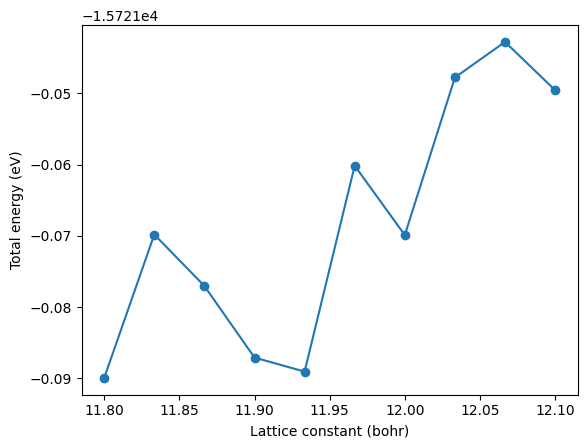

In [94]:
fig,ax = plt.subplots()

ax.plot(lattice_constants, total_energies,'o-')
ax.set_xlabel('Lattice constant (bohr)')
ax.set_ylabel('Total energy (eV)')

plt.show()

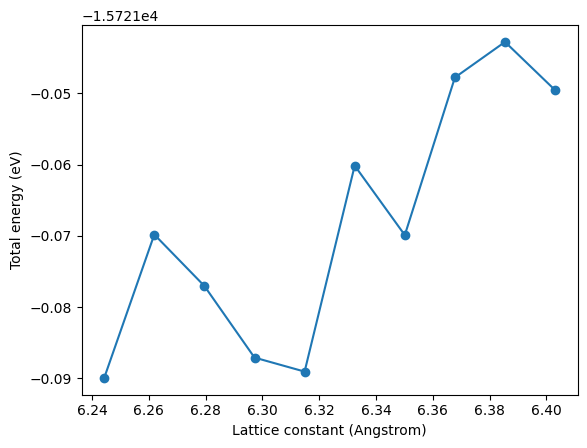

In [95]:
fig,ax = plt.subplots()

ax.plot(lattice_constants*0.529177, total_energies,'o-')
ax.set_xlabel('Lattice constant (Angstrom)')
ax.set_ylabel('Total energy (eV)')

plt.show()